In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
path = r"C:\Users\Rahul\Desktop\avocado.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
#checking dataset shapes
df.shape

(18249, 14)

In [4]:
# 18249 rows and 14 columns present in dataset

In [5]:
# checking columns names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
# col. named Unnamed:0 doesnt having any significance, so i am removing it.

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
#final col. removed
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
#finally 13 columns present in dataset

In [10]:
#checking datatypes of dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [11]:
#two types of datatypes is observed-object, type and region

In [12]:
#checking null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

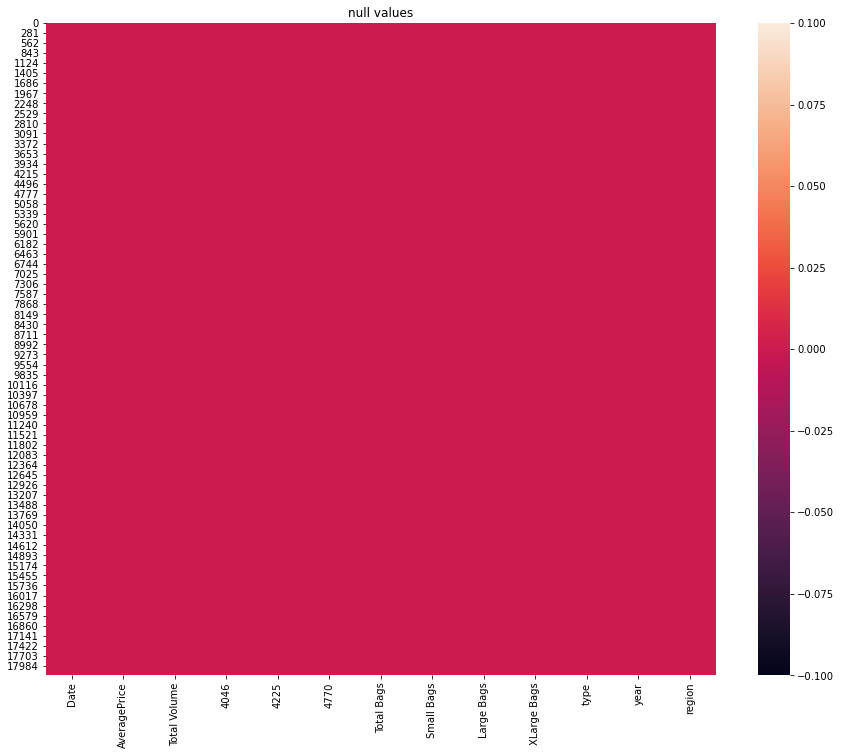

In [13]:
#checking null values using heatmap
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [14]:
encode = LabelEncoder()
Converted=encode.fit_transform 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [15]:
df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [16]:
#corelation matrix
corr_mat=df.corr()
corr_mat

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


<AxesSubplot:>

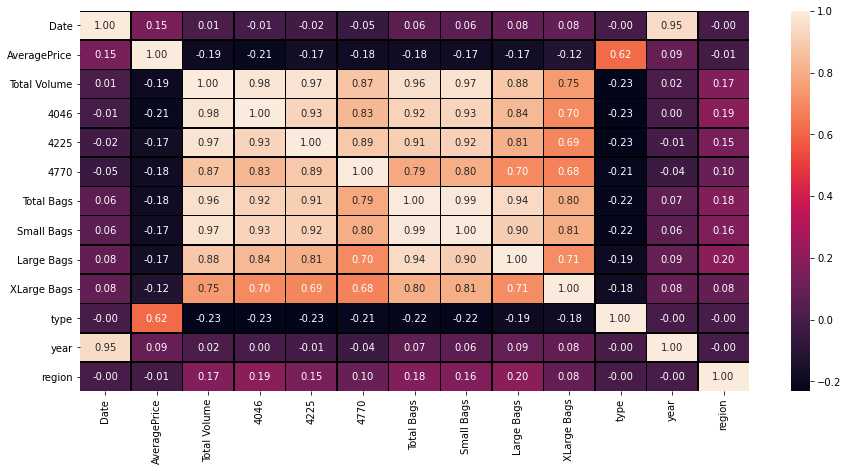

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5, linecolor="black", fmt='.2f')

In [18]:
#for better understanding correalation with target col.
corr_mat=df.corr()
corr_mat["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
type            0.615845
Date            0.145514
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

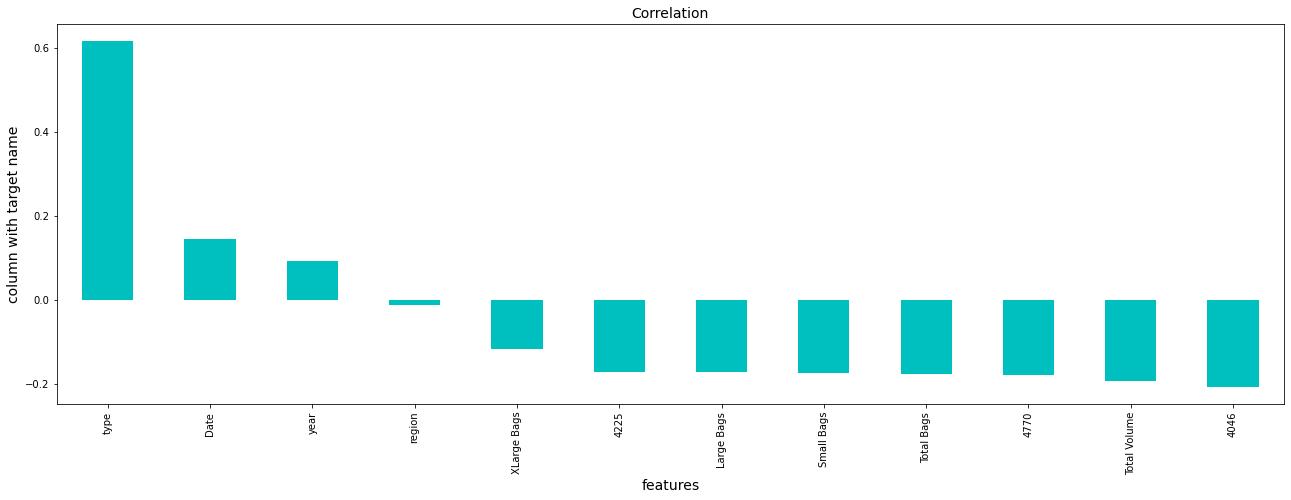

In [19]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

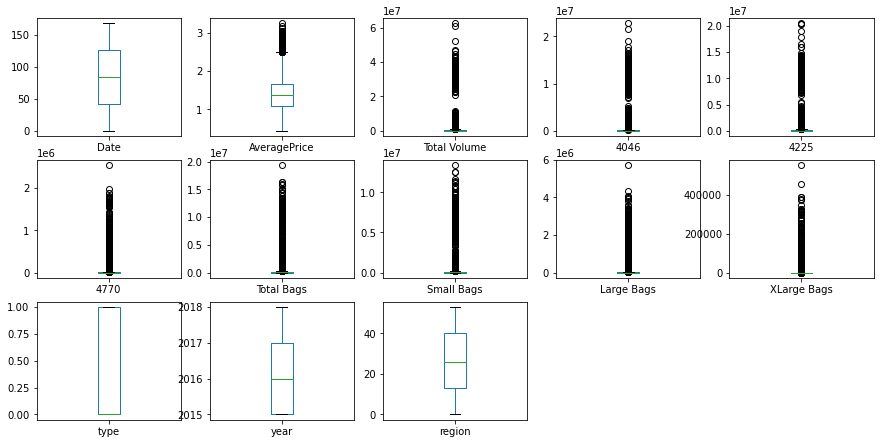

In [20]:
#checking outliers
df.plot(kind='box', subplots= True, layout=(4,5), figsize=(15,10))

In [21]:
# removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [22]:
print("shape before and after")
print("shape before.ljust(20)",";",df.shape)
print("shape after.ljust(20)",";",df_new.shape)
print("Percentage Loss".ljust(20),";",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before.ljust(20) ; (18249, 13)
shape after.ljust(20) ; (17651, 13)
Percentage Loss      ; 0.03276891884486821


In [23]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


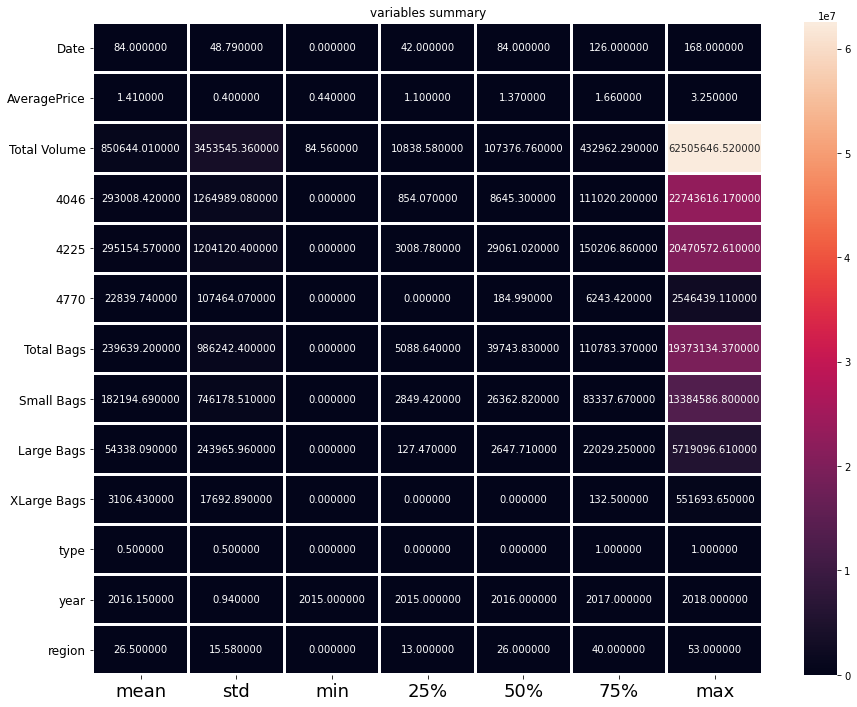

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

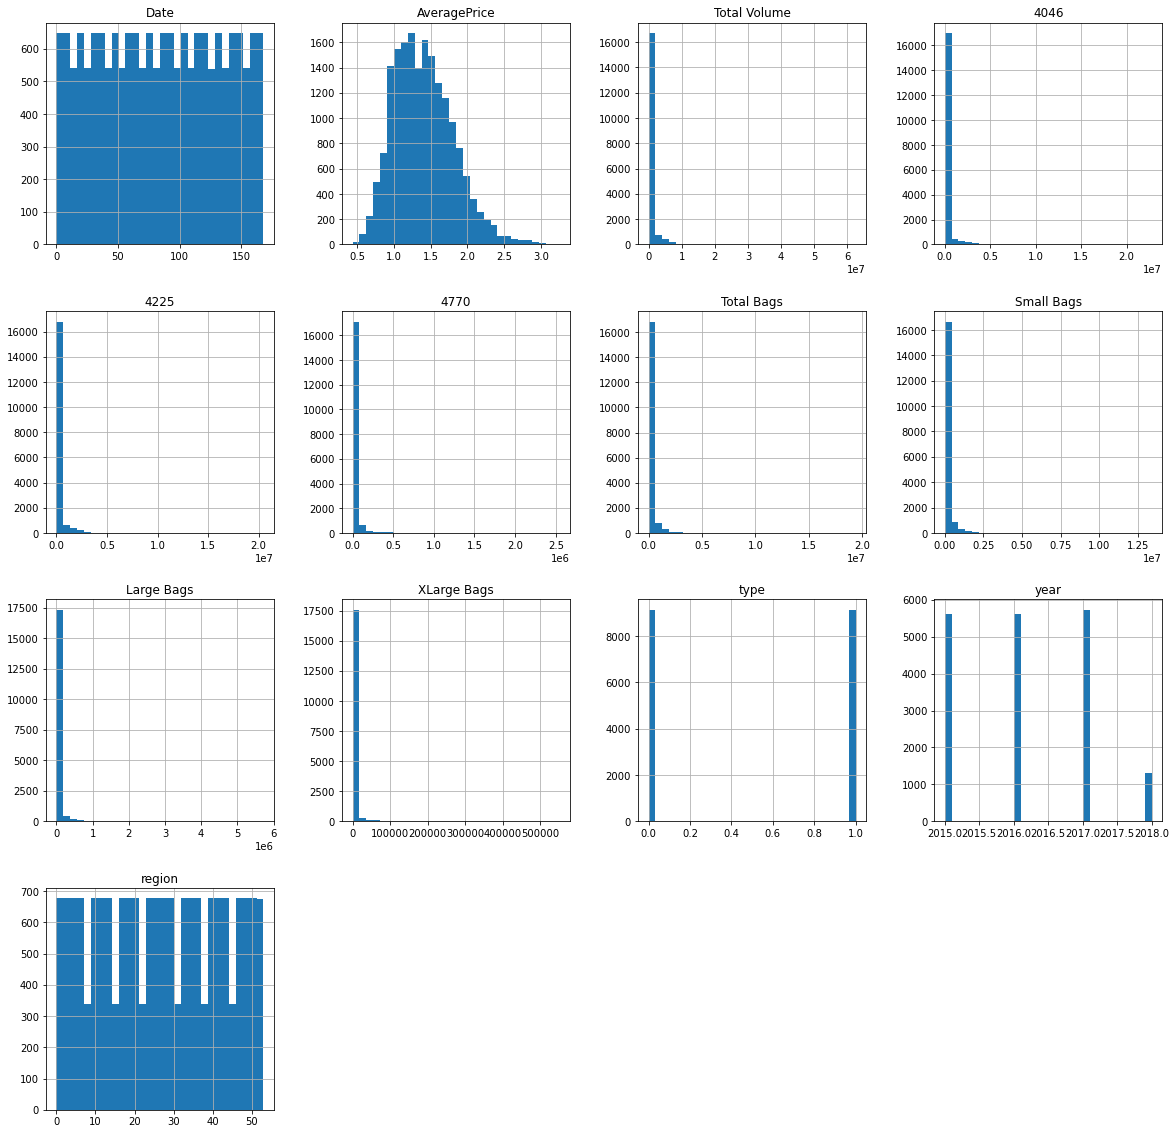

In [25]:
#plotting histogram for checking distribution-univariate analysis
df.hist(figsize=(20, 20), grid=True, layout=(4,4),bins=30)

In [26]:
# AveragePrice is normal distributed 

In [27]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [28]:
#checking skewness
df_new.skew()

Date            0.013714
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [29]:
skew=('Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [30]:
df_new.skew()

Date            0.013714
AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [31]:
df.drop('XLarge Bags',axis=1,inplace=True)

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

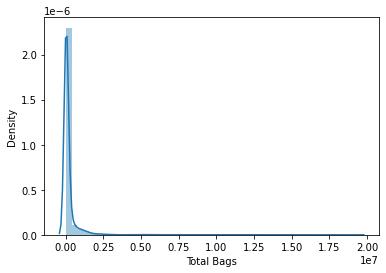

In [32]:
sns.distplot(df["Total Bags"])

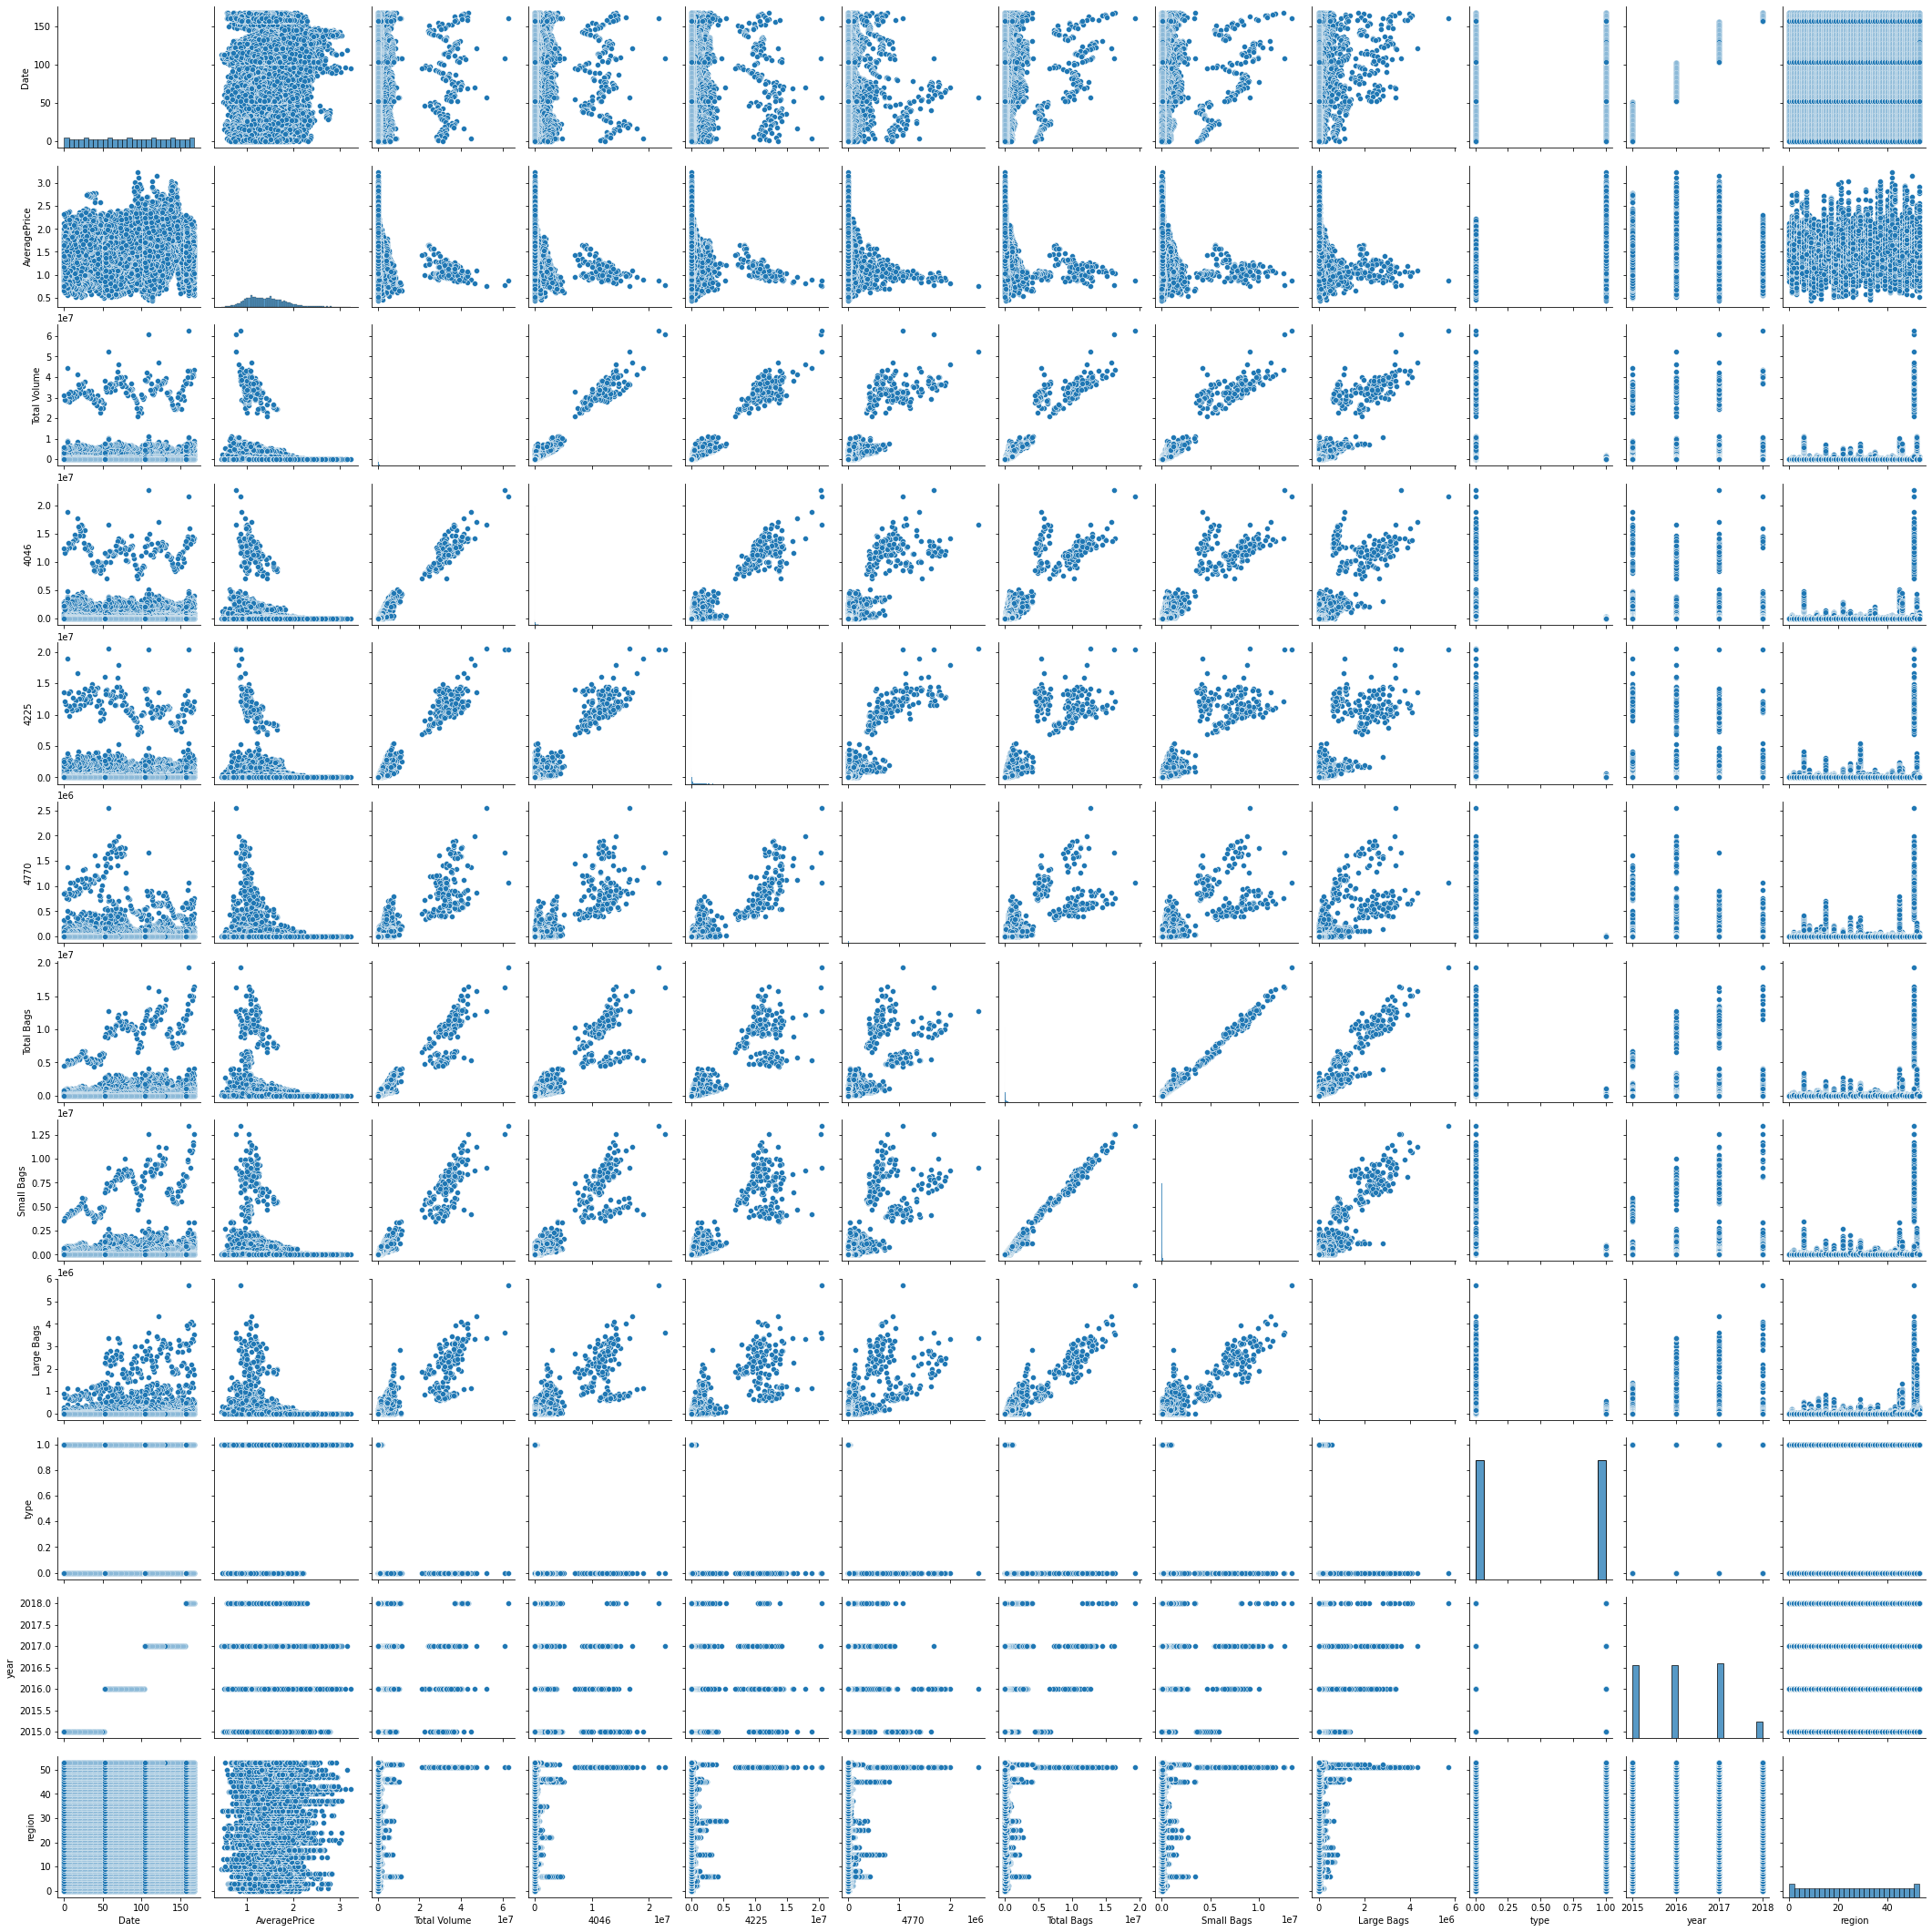

In [33]:
sns.pairplot(df)
plt.show()

In [34]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split

In [35]:
x=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values

In [36]:
#splitting data
x=df_new.drop("AveragePrice", axis=1)
y=df_new["AveragePrice"]

In [37]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [38]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [40]:
#model building-RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_RFR = RandomForestRegressor(max_depth=10)

model_RFR.fit(x_train, y_train)

predict_train = model_RFR.predict(x_train)
predict_test = model_RFR.predict(x_train)

print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(y_train, predict_test)**(0.5))


RMSE on train data:  0.11798689273361883
RMSE on test data:  0.11798689273361883


In [41]:
y_pred = model_RFR.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.7824151254993045
0.023805157052837048


In [42]:
#LinearRegression
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

ln.fit(x, y)

LinearRegression()

In [43]:
ln.predict([x[0]])

array([1.3878901])

In [44]:
y[0]

1.33

In [45]:
y_pred = ln.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.18594249698799525
0.06756583407134102


In [46]:
#SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x,y)
svr.predict([x[0]])

array([1.25317343])

In [47]:
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.7147121249475873
0.031833198110706305


In [48]:
#DTR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x,y)
dt.predict([x[0]])
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

1.0
1.69900768507877e-34


In [53]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV

In [58]:
#DTR
parameters = {'criterion' :['mse', 'mae','poisson'],
              'splitter': ['best', 'random'],
              'max_features': ['sqrt', 'auto', 'log']}

In [59]:
GCV = GridSearchCV(dt,parameters,cv=3)

In [60]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_features': ['sqrt', 'auto', 'log'],
                         'splitter': ['best', 'random']})

In [61]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}

In [63]:
#saving model
import joblib
joblib.dump(dt,"Avacado.pkl")

['Avacado.pkl']